<a href="https://colab.research.google.com/github/MohammadUsman0/Deep-learning-models/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple CNN
A simple Convolutional Neural Network (CNN) for image classification on MNIST Dataset




## 1. Import libraries and modules

In [60]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.utils import np_utils                                                    
from keras.datasets import mnist
import matplotlib.pyplot as plt


## 2. Load MNIST data into train and test sets
* **MNIST** database of handwritten digits: Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
* **x**:       Numpy array of training data (if the model has a single input), or list of Numpy arrays (if the model has multiple inputs).
* **y**:       Numpy array of target (label) data (if the model has a single output), or list of Numpy arrays (if the model has multiple outputs)

In [61]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

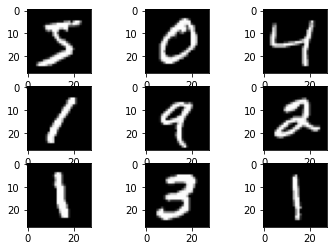

In [63]:
#plot some images from training data
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 3. Preprocess input data

In [40]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Scale images between [0, 1] range
X_train /= 255
X_test /= 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 4. Preprocess class labels


In [41]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 5. Define model architecture
* **Softmax** converts a real vector to a vector of categorical probabilities.
* **Dropout** consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
* **Convolution2D** layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
* **MaxPooling2D** Downsamples the input representation by taking the maximum value over the window defined

for better understanding visit [Keras layers](https://keras.io/api/layers/)

In [42]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Convolution2D(32, kernel_size=(3, 3), activation="relu"), #32 is number of filters or kernel of size 3x3
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Convolution2D(64, kernel_size=(3, 3), activation="relu"), #64 is number of filters or kernel of size 3x3
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

## 6. Compile model
* **compile**:     Configures the model for training.
* **loss**:        String (name of objective function) or objective function

In [43]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## 7. Fit model on training data
* **fit**:     Trains the model for a given number of epochs (iterations on a dataset).
* **verbose**: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
* **epochs**:  Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
* **batch_size**:  Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.

In [44]:
batch_size = 128
epochs = 50

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

#To save model uncomment below line
#model.save('final_model.h5')

Epoch 1/5
422/422 [==============================] - 37s 87ms/step - loss: 3.0284 - accuracy: 0.7402 - val_loss: 0.0814 - val_accuracy: 0.9748
Epoch 2/5
422/422 [==============================] - 36s 86ms/step - loss: 0.1708 - accuracy: 0.9481 - val_loss: 0.0557 - val_accuracy: 0.9837
Epoch 3/5
422/422 [==============================] - 37s 87ms/step - loss: 0.1165 - accuracy: 0.9630 - val_loss: 0.0483 - val_accuracy: 0.9867
Epoch 4/5
422/422 [==============================] - 37s 87ms/step - loss: 0.0964 - accuracy: 0.9701 - val_loss: 0.0443 - val_accuracy: 0.9882
Epoch 5/5
422/422 [==============================] - 37s 87ms/step - loss: 0.0892 - accuracy: 0.9723 - val_loss: 0.0434 - val_accuracy: 0.9868


In [48]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


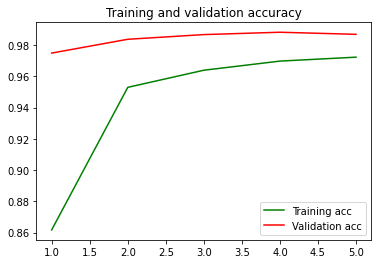

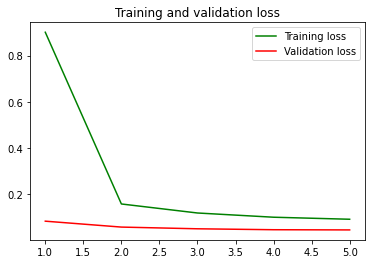

In [55]:
    #plot model Accuracy and loss on training and validation data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', color='green', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red',  label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'b', color='green', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

8. Evaluate model on test data
* **evaluate**:    Returns the loss value & metrics values for the model in test mode.

In [56]:
score = model.evaluate(x_test, y_test, verbose=0)    
print("Test loss:", score[0])
print("Test accuracy:", score[1])              

Test loss: 0.04975337162613869
Test accuracy: 0.9835000038146973
